Question 1

In [1]:
#Step 1: Import the necessary libraries
import pandas as pd

In [4]:
#Step 2 and 3: Import the dataset from this address and  assign it to a variable called users.
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [100]:
# Step 4: Discover what is the mean age per occupation

MeanAgeByOccupation = users.groupby('occupation')['age'].mean()
print(MeanAgeByOccupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [6]:
#Step 5: Calculate male ratio per occupation and sort it in descending order

users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)
(users.groupby('occupation').is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [9]:
#Step 6: For each occupation, calculate minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [10]:
# Step 7: For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [101]:
# Step 8:For each occupation present the percentage of women and men
TotalByOccupationGender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

TotalByOccupation = users.groupby('occupation').agg('count')

PercentageByOccupationGender = (TotalByOccupationGender.div(TotalByOccupation, level = "occupation") * 100).round(2)

print(PercentageByOccupationGender)

                      age  gender  is_male  user_id  zip_code
occupation    gender                                         
administrator F       NaN   45.57      NaN      NaN       NaN
              M       NaN   54.43      NaN      NaN       NaN
artist        F       NaN   46.43      NaN      NaN       NaN
              M       NaN   53.57      NaN      NaN       NaN
doctor        M       NaN  100.00      NaN      NaN       NaN
educator      F       NaN   27.37      NaN      NaN       NaN
              M       NaN   72.63      NaN      NaN       NaN
engineer      F       NaN    2.99      NaN      NaN       NaN
              M       NaN   97.01      NaN      NaN       NaN
entertainment F       NaN   11.11      NaN      NaN       NaN
              M       NaN   88.89      NaN      NaN       NaN
executive     F       NaN    9.38      NaN      NaN       NaN
              M       NaN   90.62      NaN      NaN       NaN
healthcare    F       NaN   68.75      NaN      NaN       NaN
        

Question 2

In [12]:
# Step 1:Import the necessary libraries
import pandas as pd

In [14]:
#Step 2 and 3: Import the dataset from this address and  assign it to a variable called euro12

euro12 = pd.read_csv( "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [15]:
#Step 4. Select only the Goal column
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [16]:
#Step 5: How many team participated in the Euro2012?
euro12['Team'].count()

16

In [17]:
#Step 6: What is the number of columns in the dataset?
euro12.shape[1]

35

In [18]:
#Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [19]:
#Step 8: Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards','Yellow Cards'], inplace = True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [20]:
#Step 9: Calculate the mean Yellow Cards given per Team

euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [21]:
#Step 10. Filter teams that scored more than 6 goalsStep

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [22]:
#Step 11. Select the teams that start with G

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [23]:
#Step 12: Select the first 7 columns

euro12.iloc[ : , : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [24]:
#Step 13: Select all columns except the last 3

euro12.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [25]:
#Step 14: Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3:

In [26]:
#Step 1: Import the necessary libraries

import pandas as pd
import random

In [102]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
a1 = [[random.randint(1, 4)] for i in range(100)]
df1 = pd.DataFrame(a1)

In [103]:
# The second a random number from 1 to 3
a2 = [[random.randint(1, 3)] for i in range(100)]
df2 = pd.DataFrame(a2)

In [104]:
# The third a random number from 10,000 to 30,000
a3 = [[random.randint(10000, 30000)] for i in range(100)]
df3 = pd.DataFrame(a3)

In [105]:
#Step 3: Create a DataFrame by joinning the Series by column
df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,4,2,26438
1,4,2,26035
2,4,2,15262
3,2,1,29297
4,3,3,18268
...,...,...,...
95,1,3,12005
96,1,3,26532
97,4,3,15922
98,4,2,10470


In [31]:
#Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,3,20486
1,4,2,24767
2,3,3,14060
3,2,2,19550
4,1,2,20661
...,...,...,...
95,2,2,12092
96,2,3,21569
97,1,3,17623
98,4,3,25878


In [32]:
#Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new


0     2320486
1     4224767
2     3314060
3     2219550
4     1220661
       ...   
95    2212092
96    2321569
97    1317623
98    4325878
99    1115677
Name: bedrs, Length: 100, dtype: object

In [33]:
#Step 6 and 7: Ops it seems it is going only until index 99. Is it true? Reindex the DataFrame so it goes from 0 to 299
df_new = df_new.reset_index(drop=True)
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      2320486
1      4224767
2      3314060
3      2219550
4      1220661
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

Question 4

In [34]:
#Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [35]:
#Step 2: Import the dataset from the attached file wind.txt

data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [36]:
#Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
#re-arrange cols
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [39]:
#Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year ==2061,
data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1861-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1861-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1861-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1861-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1861-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [43]:
#Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Data1 = data.set_index("Date")
Data1.index.astype("datetime64[ns]")

DatetimeIndex(['1861-01-01', '1861-01-02', '1861-01-03', '1861-01-04',
               '1861-01-05', '1861-01-06', '1861-01-07', '1861-01-08',
               '1861-01-09', '1861-01-10',
               ...
               '1878-12-22', '1878-12-23', '1878-12-24', '1878-12-25',
               '1878-12-26', '1878-12-27', '1878-12-28', '1878-12-29',
               '1878-12-30', '1878-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [44]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
newData.isnull().values.ravel().sum()

31

In [45]:
#Step 7. Compute how many non-missing values there are in total.
nData = newData.count()
print("There are total ", nData.sum(), " Non-missing values.")

There are total  78857  Non-missing values.


In [46]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times
x = newData.mean()
x

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [49]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
# windspeeds and standard deviations of the windspeeds at each location over all the days
# A different set of numbers for each location.
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res

In [50]:
loc_stats = newData.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [51]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
#windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.
day_stats = newData.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1861-01-01,9.29,18.50,13.018182,2.808875
1861-01-02,6.50,17.54,11.336364,3.188994
1861-01-03,6.17,18.50,11.641818,3.681912
1861-01-04,1.79,11.75,6.619167,3.198126
1861-01-05,6.17,13.33,10.630000,2.445356


In [52]:
#Step 11: Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
jan_data = newData[newData.index.month == 1]
jan_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [53]:
#Step 12: Downsample the record to a yearly frequency for each location. 
print( "Yearly:\n", newData.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1861-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1862-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1863-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1864-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1865-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1866-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1867-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1868-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1869-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1870-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1871-12-31  11.273123   9.095178  11.088329  5.241507  

In [54]:
#Step 13: Downsample the record to a monthly frequency for each location. 
print("Monthly:\n", newData.resample('M').mean())

Monthly:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1861-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1861-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1861-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1861-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1861-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1878-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1878-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1878-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1878-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1878-12-31  16.175484  13.748065  15.63516

In [55]:
#Step 14: Downsample the record to a weekly frequency for each location.
print("Weekly:\n", newData.resample('W').mean())

Weekly:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1861-01-06  14.228333  11.968000  11.576667   7.223333   8.882000   6.550000   
1861-01-13  12.951429  10.211429  11.714286   5.748571   9.040000   6.660000   
1861-01-20  12.798571   9.748571  12.552857   5.577143   7.830000   6.180000   
1861-01-27  17.932857  13.095714  16.257143  10.132857  14.260000  12.234286   
1861-02-03  17.146667  17.065714  13.332857   9.114286  15.134286  10.225714   
...               ...        ...        ...        ...        ...        ...   
1878-12-08  19.494286  18.417143  17.034286   9.212857  15.287143  12.761429   
1878-12-15  19.455714  18.567143  15.934286   8.808571  13.712857  10.071429   
1878-12-22  11.078571   7.068571  11.898571   3.022857   6.450000   4.005714   
1878-12-29  13.017143  10.011429  14.000000   5.874286   8.881429   8.498571   
1879-01-05  19.415000  15.72500

In [56]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations
#for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.
stats1 = newData.resample('W').mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
print(stats1)

          RPT         VAL         ROS         KIL         SHA         BIR  \
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000   
1    3.995714    2.322857    4.725714    1.554286    3.087143    1.351429   
2   22.961429   21.538571   24.290000   15.267143   19.340000   14.950000   
3   12.369131   10.647675   11.670467    6.308729   10.456445    7.094321   
4    3.423471    3.374883    2.860915    2.171503    3.122493    2.529480   

          DUB         CLA         MUL         CLO         BEL         MAL  
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
1    1.905714    1.612857    2.481429    1.648571    3.310000    3.705714  
2   21.242857   16.418571   16.548571   17.451429   24.998571   29.578571  
3    9.804847    8.497488    8.497923    8.710206   13.121113   15.605631  
4    3.346802    2.832217    2.630672    2.921477    3.730396    4.481667  


Question 5

In [57]:
#Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [58]:
#Step 2 and 3: Import the dataset from this address and assign it to a variable called chipo. 
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [59]:
#Step 4: See the first 10 entries.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [60]:
#Step 5: What is the number of observations in the dataset? 
chipo.shape[0]

4622

In [61]:
#Step 6: What is the number of columns in the dataset?
chipo.shape[1]

5

In [62]:
#Step 7: Print the name of all the columns. 
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [63]:
#Step 8: How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [64]:
#Step 9: Which was the most-ordered item?
item = chipo.groupby('item_name')
item = item.sum()
item = item.sort_values(['quantity'], ascending=False)
item.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [65]:
item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [67]:
#Step 10: For the most-ordered item, how many items were ordered?
chipo1 = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
chipo1.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [68]:
#Step 11: What was the most ordered item in the choice_description column? 
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [69]:
#Step 12: How many items were orderd in total?
chipo.quantity.sum()

4972

In [70]:
#Step 13: Turn the item price into a float. Check the item price type.
chipo.item_price.dtype

dtype('O')

In [71]:
#Create a lambda function and change the type of item price
chgType = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(chgType)

In [72]:
#Check the item price type.
chipo.item_price.dtype

dtype('float64')

In [73]:
#Step 14. How much was the revenue for the period in the dataset? 
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [74]:
#Step 15: How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [75]:
#Step 16: What is the average revenue amount per order? 
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [76]:
#Step 17: How many different items are sold?
chipo.item_name.value_counts().count()

50

Question 6:

In [77]:
#Create a line plot showing the number of marriages and divorces per capita in the
#U.S. between 1867 and 2014. Label both lines and show the legend.
#Don't forget to label your axes!
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

<Figure size 640x480 with 0 Axes>

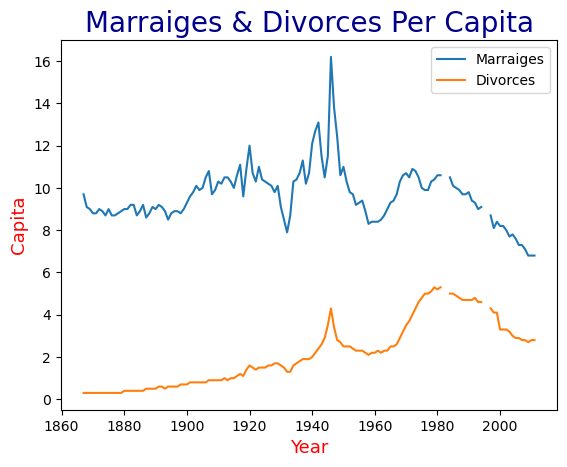

In [81]:
plt.figure()
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.title('Marraiges & Divorces Per Capita', color = 'Darkblue', fontsize = 20)
plt.xlabel('Year', color = 'Red', fontsize = 13)
plt.ylabel('Capita', color = 'Red', fontsize = 13)
plt.show()

Question 7:

In [84]:
#Create a vertical bar chart comparing the number of marriages and divorces per
#capita in the U.S. between 1900, 1950, and 2000.
#Don't forget to label your axes!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
USMD = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [86]:
Avar = USMD.loc[USMD.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
Avar

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


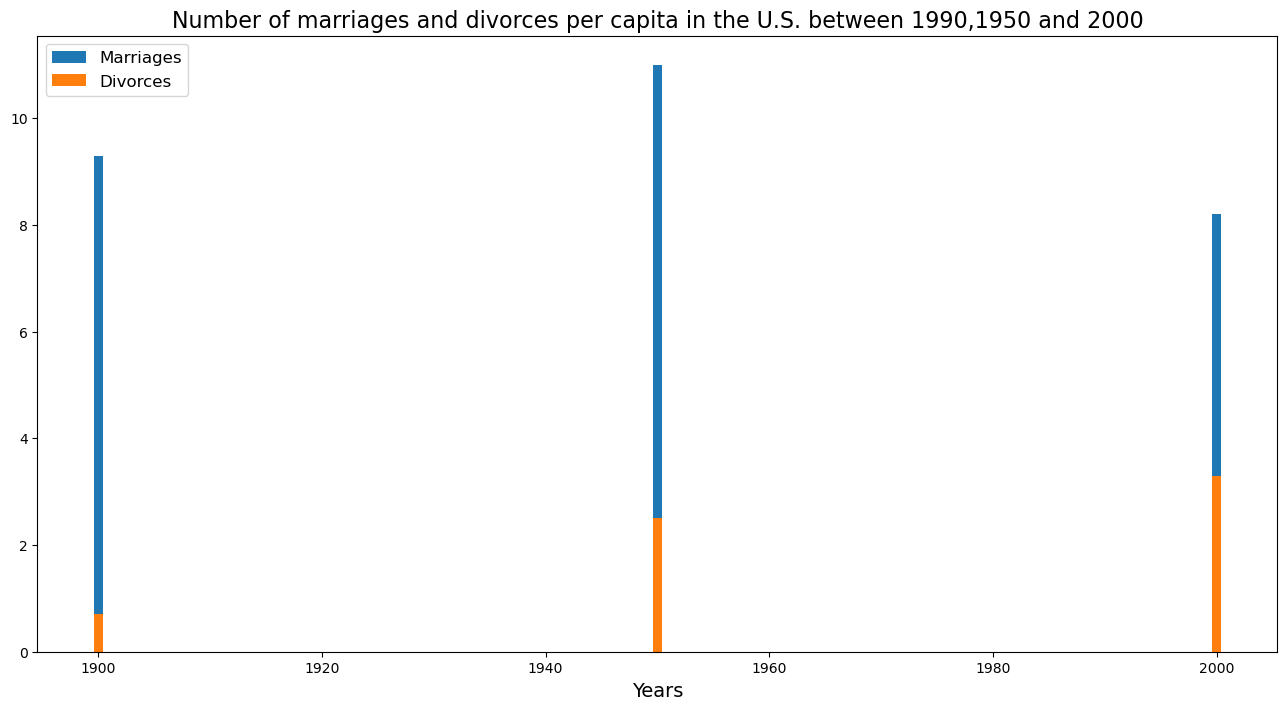

In [87]:
Avar = Avar[Avar['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = Avar['Year']
marriages = Avar['Marriages_per_1000']
divorces = Avar['Divorces_per_1000']
Avar = plt.figure(figsize= (16,8))
Avar = plt.bar(years, marriages, label ='Marriages')
Avar = plt.bar(years, divorces, label = 'Divorces')
Avar = plt.title("Number of marriages and divorces per capita in the U.S. between 1990,1950 and 2000", fontsize=16)
Avar = plt.xlabel("Years", fontsize=14)
Avar = plt.legend(fontsize = 12, loc = "upper left")
Avar

Question 8:

In [88]:
#Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
#the actors by their kill count and label each bar with the corresponding actor's name.
#Don't forget to label your axes!
data = pd.read_csv('actor_kill_counts.csv')
newData = data.sort_values("Count", ascending = True)

Text(0, 0.5, 'Actor')

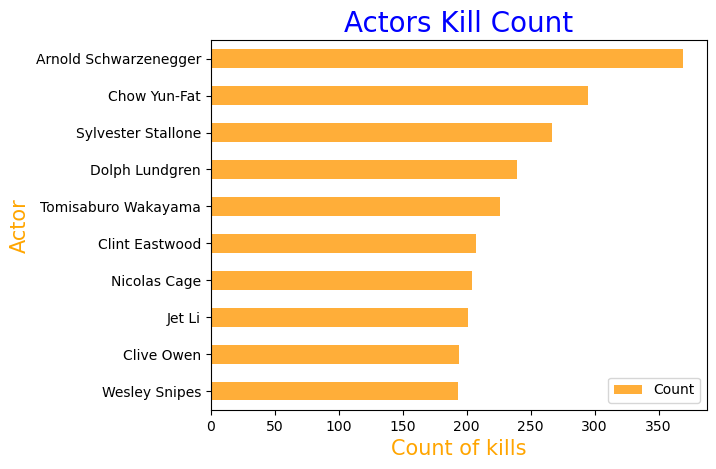

In [89]:
newData.plot.barh(x='Actor', y='Count', color = '#FFAE39')
plt.title('Actors Kill Count', fontsize=20, color = 'Blue')
plt.xlabel('Count of kills', color = 'Orange', fontsize = 15)
plt.ylabel('Actor', color = 'Orange', fontsize = 15)

Question 9:

In [90]:
#Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
#Make sure that the pie chart is an even circle, labels the categories, and shows the
#percentage breakdown of the categories.
data = pd.read_csv('roman-emperor-reigns.csv')

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
newdata = data.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

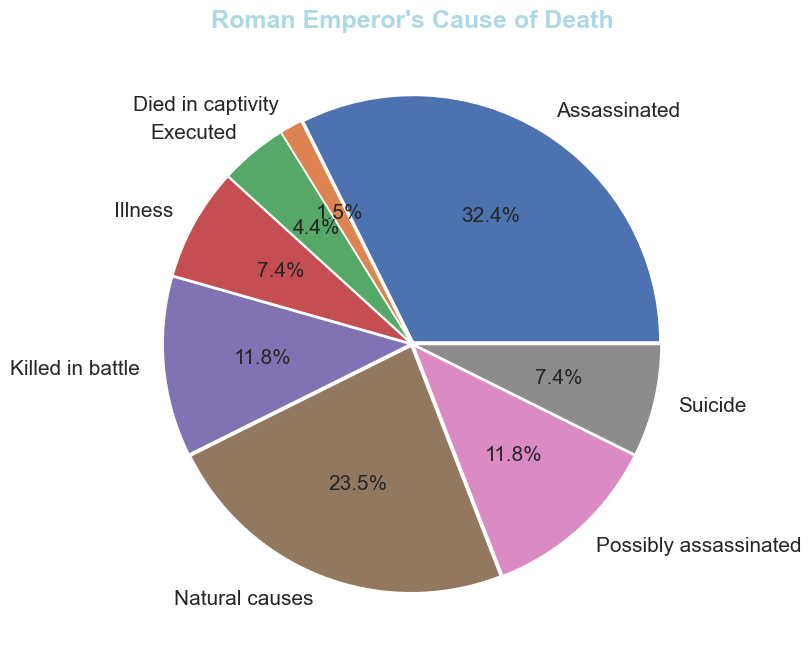

In [92]:
newdata.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Lightblue', fontsize = 18, fontweight ='bold')

Question 10:

In [93]:
#Create a scatter plot showing the relationship between the total revenue earned by
#arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
#Don't forget to label your axes!
#Color each dot according to its year.
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

Text(0, 0.5, 'CS Doctorates Awarded')

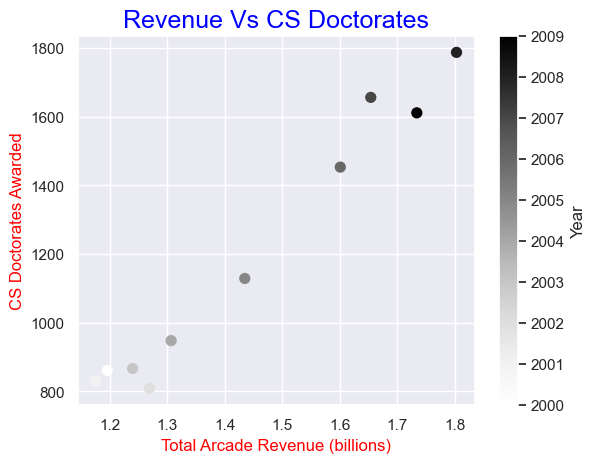

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

data.plot.scatter(x='Total Arcade Revenue (billions)',
y='Computer Science Doctorates Awarded (US)', c='Year' , s = 50)
plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Red', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 12)

Text(0, 0.5, 'CS Doctorates Awarded')

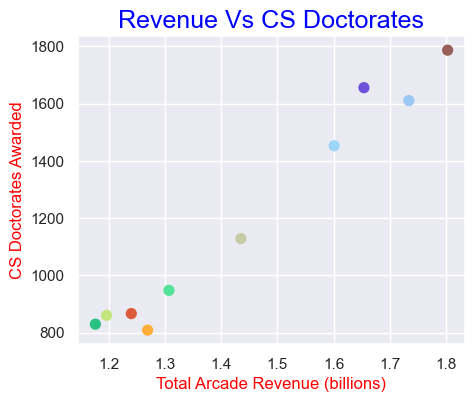

In [99]:
data.plot.scatter(x='Total Arcade Revenue (billions)',
y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))
plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Red', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Red', fontsize = 12)